### Monte Carlo Approximation

**Problem**: Computing the distribution of a function of random variable using the change of variable ca, be difficult

**Solution**: Generate S samples from the distribution $x_1, x_2, ..., x_S$. Then approximate the distribution of $f(X)$ using empirical distribution.

$$\mathbb{E}[X] = \int f(x)p(x)dx \approx \frac{1}{S} \sum_{i=1}^{S} f(x_i)$$

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

**Method of moments**

Estimate probability $p(y)$ of a random variable $Y$ with a parametered distribution $f_{\theta}$.

1. Empirical moments: $m_k \approx \sum_{i=1}^{n} y_{i}^k$
2. Solve system: $\mathbb{E}[Y^k|Y \sim f_{\theta}] = m_k$ for $k=1, 2, ...$

In [3]:
#####################
# Method of Moments #
#####################
def moments_method(samples: np.array, k: int):
    def moment(i):
        return (samples**i).sum() / len(samples)
    return [moment(i) for i in range(1, k+1)]


# Application to gaussian variable
def estimate_gaussian_var_params(samples):
    moments = moments_method(samples, k=2)
    estimated_mu = moments[0]
    estimated_sigma = np.sqrt(moments[1]-moments[0])
    return estimated_mu, estimated_sigma

mu = 0.2
sigma = 1.7
print("Choosed params:")
print("mu = %f - sigma = %f" % (mu, sigma))
print("Estimation:")
for n in [100, 1000, 10000]:
    gaussian_var = np.random.normal(loc=mu, scale=sigma, size=n)
    estimated_mu, estimated_sigma = estimate_gaussian_var_params(gaussian_var)
    print("n = %5d - mu = %.5f - sigma = %.5f" % (n, estimated_mu, estimated_sigma))


Choosed params:
mu = 0.200000 - sigma = 1.700000
Estimation:
n =   100 - mu = 0.08399 - sigma = 1.57754
n =  1000 - mu = 0.19970 - sigma = 1.61433
n = 10000 - mu = 0.19767 - sigma = 1.64725


**Estimating $\pi$ by Monte Carlo integration**

Let's consider the unit circle. Then it's area is:

\begin{align}
I &= \pi \\
  &= \int_{-1}^1 \int_{-1}^1 \mathbb{1}_{\{x^2 + y^2 \leq 1\}} \, dx \, dy
\end{align}

We consider $X\sim \mathcal{U}_{[-1,1]^2}$. Then: $$\mathbb{P}(X \in \mathcal{S}) = \frac{\mathcal{A}(\mathcal{S})}{\mathcal{A}([-1, 1]^2)}$$

with $\mathcal{S}=\{x^2+y^2 \leq 1 : (x,y) \in [-1, 1]^2\}$

Thus:
\begin{align}
\mathcal{A}(\mathcal{S}) &= \mathcal{A}([-1, 1]^2) \mathbb{P}(X \in \mathcal{S}) \\
 &= 4\mathbb{E}[\mathbb{1}_{\mathcal{S}}] \\
 &\approx \frac{4}{n} \sum_{i=1}^{n}\mathbb{1}_{\mathcal{S}}(x_i)
\end{align}

10 3.6
100 3.36
1000 3.08
10000 3.1356


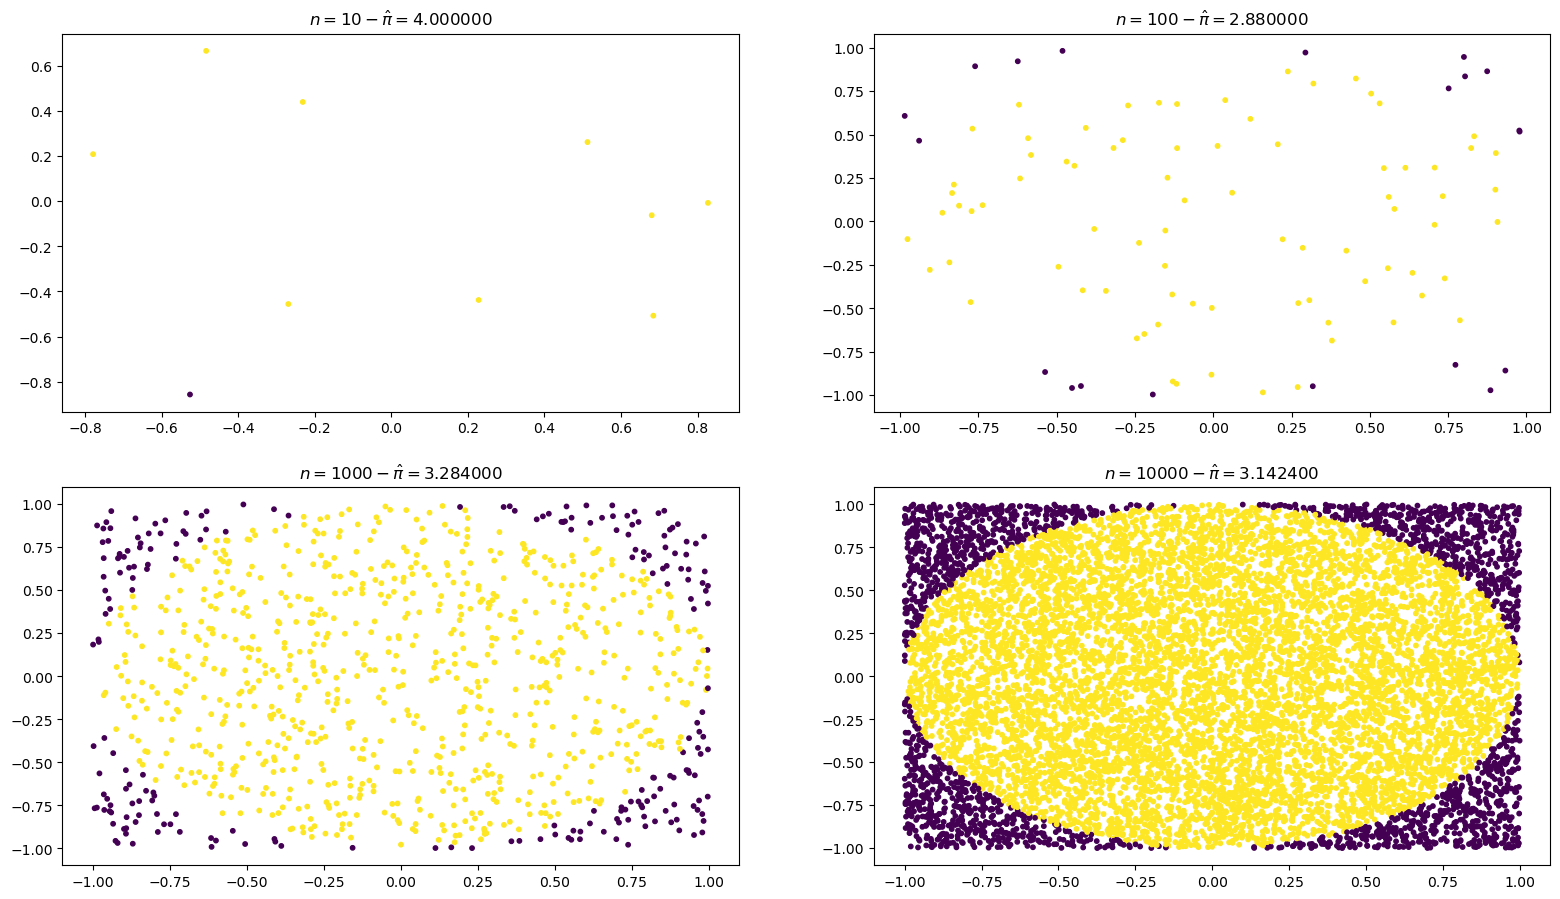

In [6]:
def monte_carlo_pi():
    def compute_pi(n):
        pi = 0
        for _ in range(n):
            X = np.random.uniform(-1, 1, size=2)
            if X[0]**2 + X[1]**2 <=1: pi+=1
        return 4*pi/n
    for n in [10, 100, 1000, 10000]:
        print(n, compute_pi(n))

    fig, axes = plt.subplots(2,2, figsize=(19.2, 10.8))
    axes = axes.ravel()
    target = lambda x: (x[0]**2+x[1]**2 <= 1).astype(int)
    for i in range(1,5):
        n = 10**i
        x = np.random.uniform(-1,1,size=(n, 2))
        y = [target(t) for t in x]
        axes[i-1].scatter(x[:, 0], x[:, 1], s=10, c=y)
        axes[i-1].set_title(r"$n=%d - \hat{\pi}=%f$" % (n, compute_pi(n)))
    plt.show()

monte_carlo_pi()